In [1]:
import main

In [2]:
lasfile = "./scarp1_1.las"
x, z = main.condition_las_profile(lasfile)

In [3]:
scarp1 = main.Scarp(x, z)

In [4]:
scarp1.gen_ss()
scarp1.gen_1e()

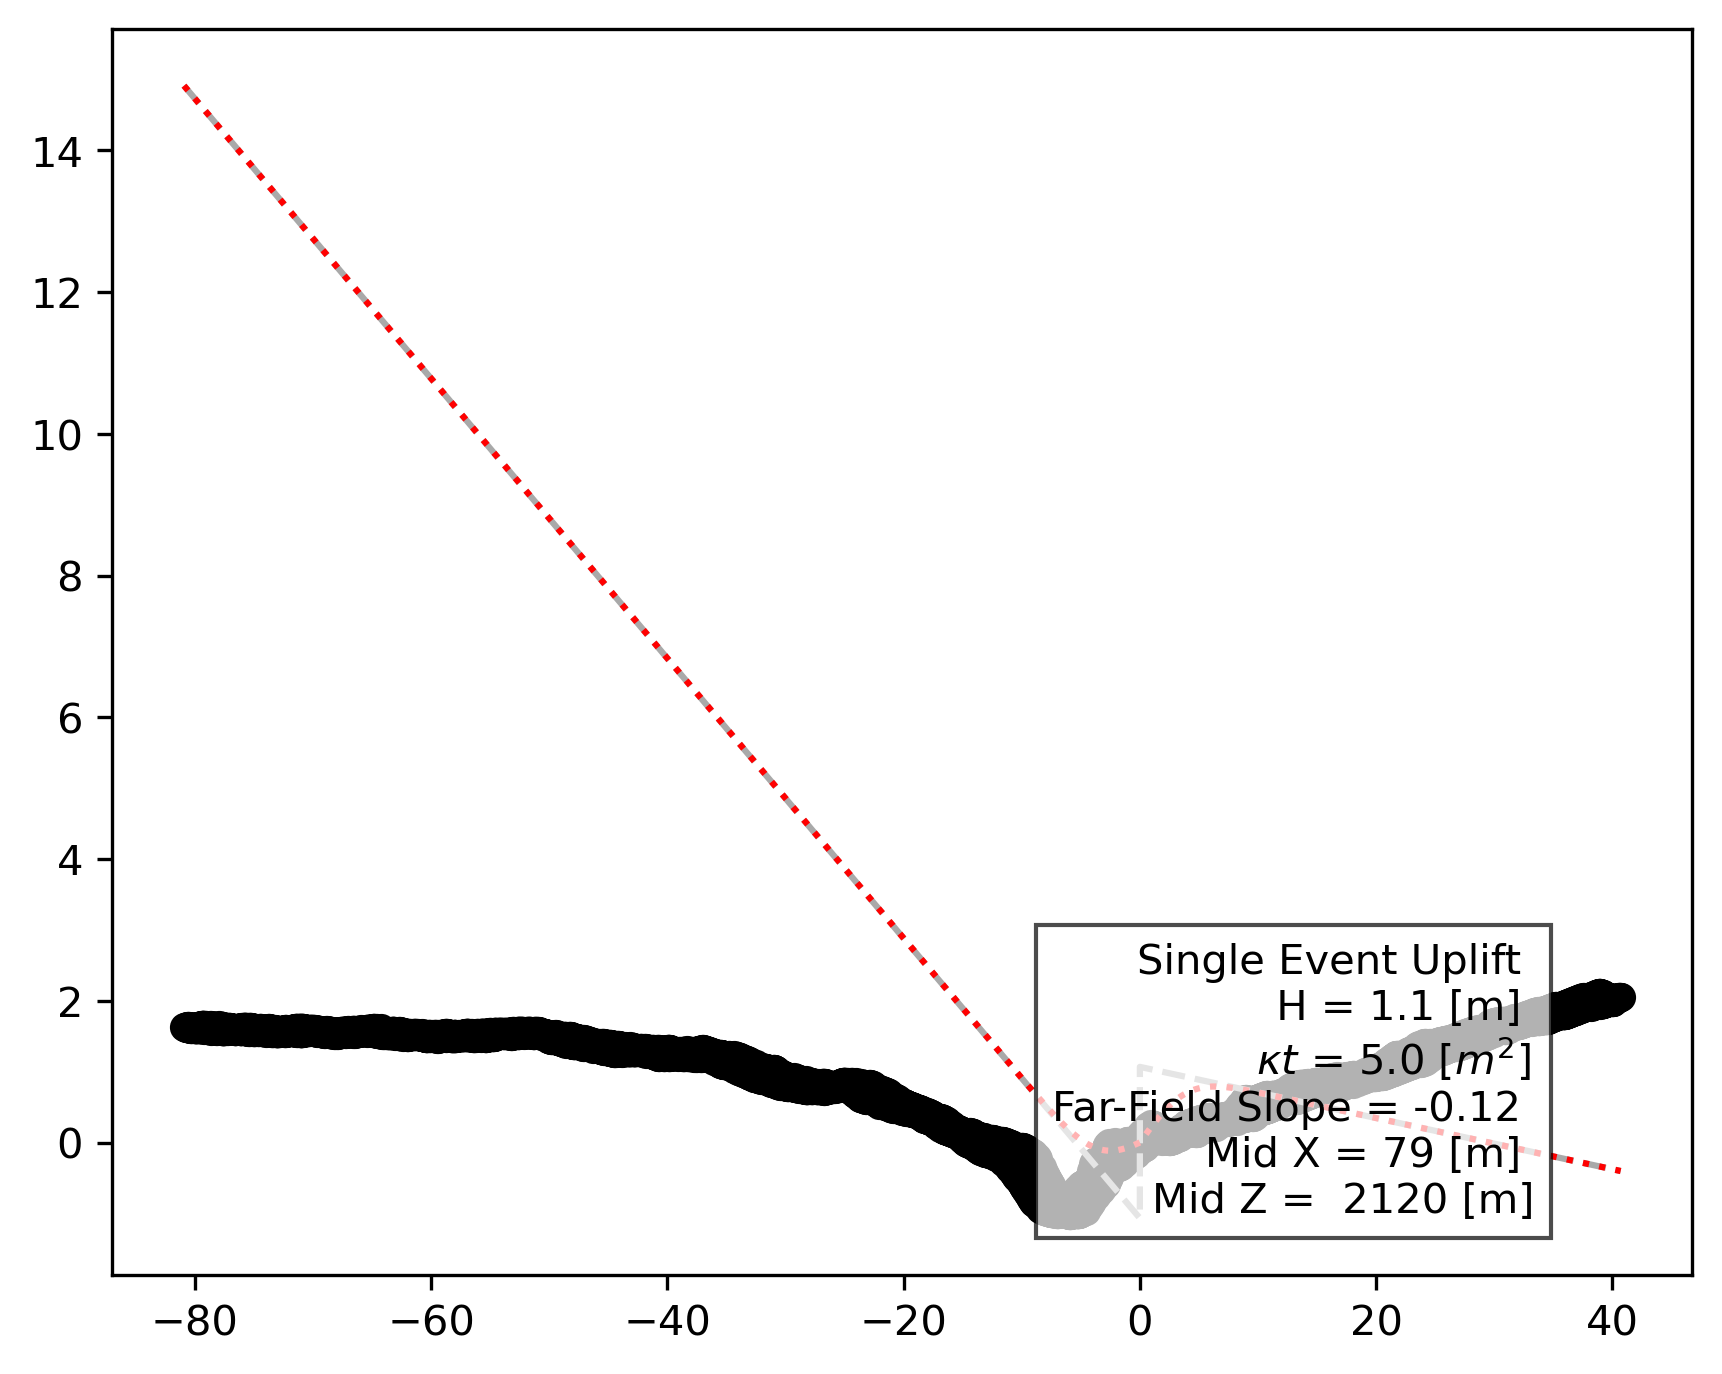

In [25]:
scarp1.aspect = 6
scarp1.plot_scarp('se')

In [16]:
scarp1.save_scarp_fig("one_event.png")